![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/68886973-eca24380-06f6-11ea-8327-3e9a22e22b43.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Health and Obesity trends

analyze health and obesity trends.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import requests

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the dump of `USDA Food Composition Database` into a `food_df` DataFrame variable.

The National Nutrient Database (NNDB) is provided by the [USDA](https://ndb.nal.usda.gov/ndb/) to allow the public to get standardized information on foods. They document the database and all supporting information on the USDA website.

> Although the file format says "txt", we call these plain CSVs files and read it using `read_csv` method. Be aware of parsing correctly `NaN` values, data separator, encoding, quotechar and any other parsing option you think necessary.



The column names are taken from the original documentation for this dataset.

> Use the given column names while reading the data.

In [9]:
column_names = ['NDB_No', 'FdGrp_Cd', 'Long_Desc', 'Shrt_Desc', 'ComName',
                'ManufacName', 'Survey', 'Ref_desc', 'Refuse', 'SciName',
                'N_Factor', 'Pro_Factor', 'Fat_Factor', 'CHO_Factor']

In [14]:
df = pd.read_csv('/content/sample_data/FOOD_DES.txt',
                      names=column_names,
                      sep='^',
                      header=None,
                      quotechar='~',
                      encoding='iso-8859-1')

In [15]:
df.head()

,NDB_No,FdGrp_Cd,Long_Desc,Shrt_Desc,ComName,ManufacName,Survey,Ref_desc,Refuse,SciName,N_Factor,Pro_Factor,Fat_Factor,CHO_Factor
0,1001,100,"Butter, salted","BUTTER,WITH SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
1,1002,100,"Butter, whipped, with salt","BUTTER,WHIPPED,W/ SALT",NaN,NaN,Y,NaN,0.0,NaN,6.38,NaN,NaN,NaN
2,1003,100,"Butter oil, anhydrous","BUTTER OIL,ANHYDROUS",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
3,1004,100,"Cheese, blue","CHEESE,BLUE",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87
4,1005,100,"Cheese, brick","CHEESE,BRICK",NaN,NaN,Y,NaN,0.0,NaN,6.38,4.27,8.79,3.87


How many products do we have?

In [17]:
df.shape[0]

2429

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Variables distribution

Analyze how values are distributed:

- Create an histogram of `Refuse` variable.
- Create a boxplot of `N_Factor` variable.

<Axes: ylabel='Frequency'>

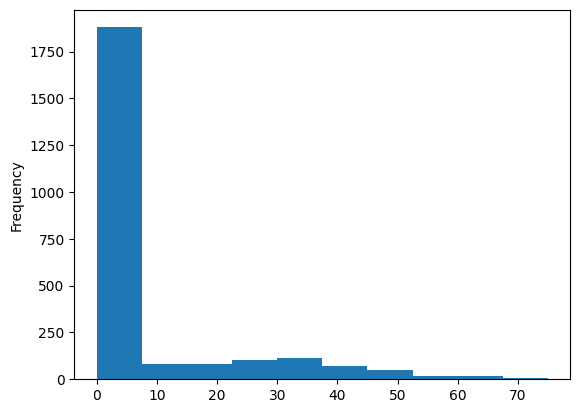

In [18]:
df['Refuse'].plot(kind = 'hist')

<Axes: >

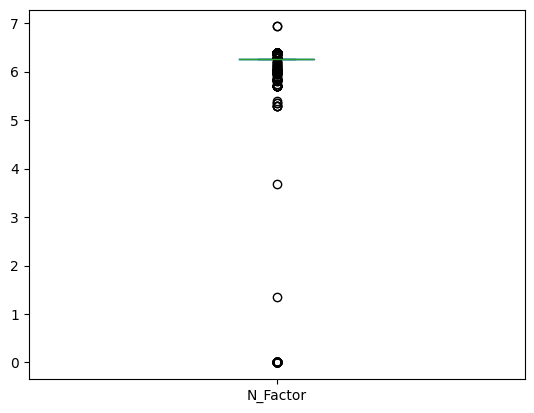

In [19]:
df['N_Factor'].plot(kind= 'box')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which are the top-10 food manufacturers with more products on `food_df`.

In [21]:
df['ManufacName'].value_counts().head(10)

,count
ManufacName,
"The Quaker Oats, Co.",71
MEAD JOHNSON,40
MOM Brands,31
ABBOT NUTRTION,26
"Post Foods, LLC",21
"Kraft Foods, Inc.",18
Chobani,17
"B&G Foods, Inc",13
GERBER,12


bar plot showing that results.

<Axes: xlabel='ManufacName'>

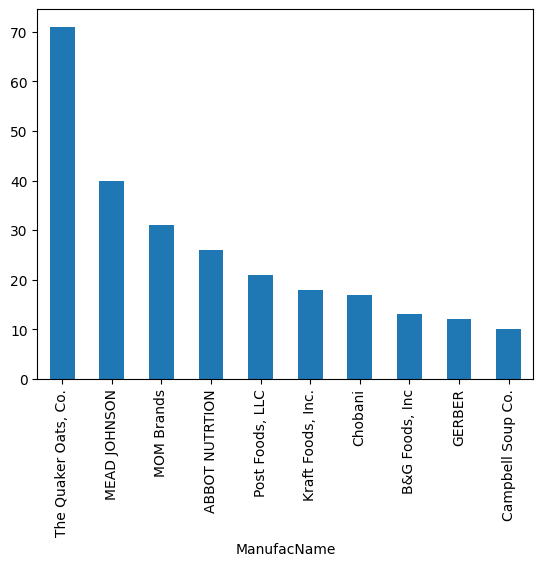

In [22]:
df['ManufacName'].value_counts().head(10).plot(kind = 'bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Analyzing Starbucks nutrition facts

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.

<img width="650" alt="Starbucks" src="https://user-images.githubusercontent.com/7065401/68891327-57f01380-06ff-11ea-8461-eb35ba0c3bb0.png">

We'll analyze the nutritional information for Starbucks’ drink menu items using this [Nutrition facts for Starbucks drinks](https://www.kaggle.com/starbucks/starbucks) data. All nutritional information for drinks are for a 12oz serving size.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Getting Starbucks' drinks information

- Create an sqlite3 connection to the `starbucks.db` SQLite3 database.
- Read from the `drinks` table just the items with more than 100 calories and save them to a `drinks_df` DataFrame variable.

In [23]:
conn = sqlite3.connect('/content/sample_data/starbucks.db')

In [25]:
drinks_df = pd.read_sql('SELECT * FROM drinks WHERE calories > 100;',conn)

conn.close()

In [26]:
drinks_df.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which is the item with the highest calories?

In [29]:
max_calories = drinks_df['Calories'].max()

max_calories_item = drinks_df.loc[drinks_df['Calories'] == max_calories]

max_calories_item

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create two groups of items: "`less or equal 150 calories`" and "`more 150 calories`"

In [30]:
less_equal_150_cal = drinks_df.loc[drinks_df['Calories'] <= 150]

In [31]:
less_equal_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
0,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
1,Iced Espresso Classics - Vanilla Latte,130.0,2.5,21.0,0.0,5.0,65.0
2,Iced Espresso Classics - Caffe Mocha,140.0,2.5,23.0,0.0,5.0,90.0
3,Iced Espresso Classics - Caramel Macchiato,130.0,2.5,21.0,0.0,5.0,65.0
4,Tazo® Bottled Black Mango,150.0,0.0,38.0,0.0,0.0,15.0


In [32]:
more_150_cal = drinks_df.loc[drinks_df['Calories'] > 150]

In [33]:
more_150_cal.head()

,Item,Calories,Fat,Carb,Fiber,Protein,Sodium
17,Starbucks® Doubleshot Protein Dark Chocolate,210.0,2.5,33.0,2.0,20.0,115.0
18,Starbucks® Doubleshot Protein Vanilla,200.0,2.5,34.0,2.0,20.0,120.0
30,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
31,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
32,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Compare item characteristics

Create a `compare_groups()` function that compares a given field of both groups of data, `less_equal_150_cal` and `more_150_cal`, by showing two overlapped histograms.

- You should use different colors per histogram. Also add a little bit of opacity (use `alpha=0.4`).
- The function MUST check that the given field exists, and raise `ValueError` with a "Field not found" message otherwise.


In [48]:
# your code goes here
def compare_groups(field):
    if field not in drinks_df.columns:
      raise ValueError("Field not found")

    less_equal_150_cal[field].plot(kind = 'hist',color='blue',alpha=0.4)
    more_150_cal[field].plot(kind = 'hist',color='orange',alpha=0.4, title=field)



showing a comparison of the `Calories` per group.

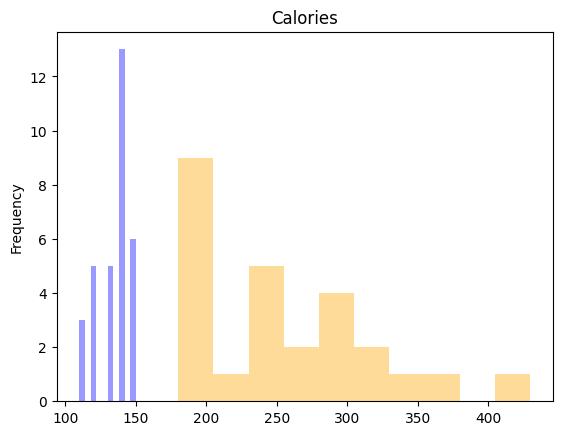

In [49]:
compare_groups('Calories')

**Less Calories implies less Sodium?**

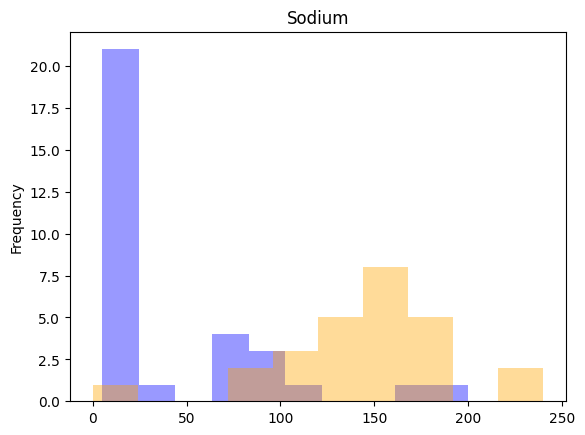

In [50]:
compare_groups('Sodium')

**Less Calories implies less Carbs?**

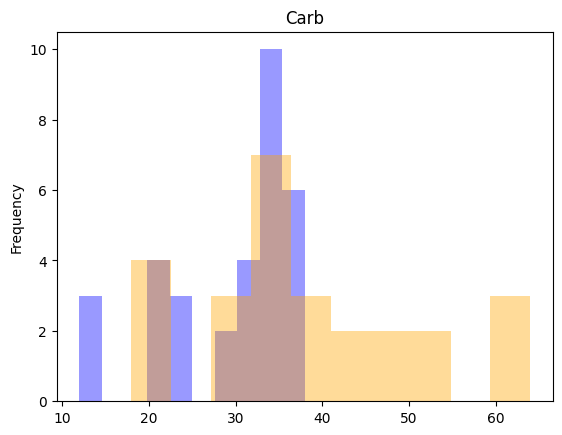

In [52]:
compare_groups('Carb')

**Less Calories implies less Proteins?**

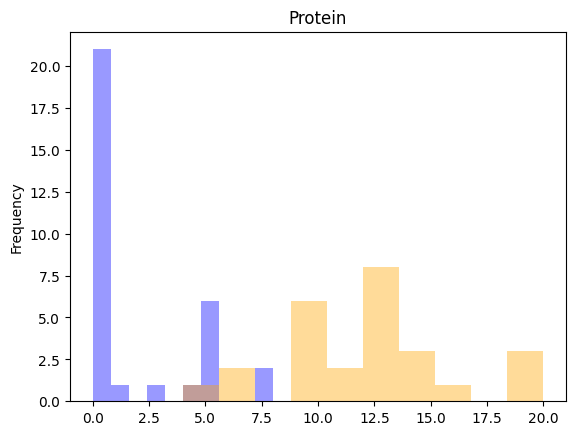

In [54]:
compare_groups('Protein')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Obesity trends in the USA

Obesity in the United States is a major health issue, resulting in numerous diseases, specifically increased risk of certain types of cancer, coronary artery disease, type 2 diabetes, stroke, as well as significant increases in early mortality and economic costs.

Let's analyze obesity trends on each state of the USA. To do that take a look at the _Obesity in the United States_ Wikipedia article where they analyze obesity revalence by state and territory.

<img width="500" alt="Obesity-trends" src="https://user-images.githubusercontent.com/7065401/68873389-5a8e4100-06de-11ea-844c-5ec622af5caa.png">

In [62]:
url = 'https://en.wikipedia.org/wiki/Obesity_in_the_United_States'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the HTML table at the end of the article into a `obesity_df` DataFrame object.

> Be aware of parsing correctly `NaN` values that appear as `—` characters.

<img width="450" alt="Obesity-table" src="https://user-images.githubusercontent.com/7065401/68880373-e5286d80-06e9-11ea-9bd0-f59ffcf02341.png">

In [73]:
col = ['States','Obesity rank','Obese adults(mid-2000s)','Obese adults(2016)',
       'Overweight adults (mid-2000s)','Obese children and adolescents (mid-2000s)']

In [89]:
df = pd.read_html(url,na_values='—')

In [90]:
obesity_df = df[1]
obesity_df.columns = col
obesity_df.head()

,States,Obesity rank,Obese adults(mid-2000s),Obese adults(2016),Overweight adults (mid-2000s),Obese children and adolescents (mid-2000s)
0,Alabama,5.0,30.1%,36.3%,65.4%,16.7%
1,Alaska,9.0,27.3%,34.2%,64.5%,11.1%
2,American Samoa,NaN,NaN,75%[96],95%[99],35%[96][100]
3,Arizona,30.0,23.3%,29.5%,59.5%,12.2%
4,Arkansas,7.0,28.1%,35.0%,64.7%,16.4%


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort the states by _Obesity rank_ and get the 5 states at the top. Show name and obesity rank.

In [93]:
obesity_df.sort_values('Obesity rank').iloc[:5,[0,1]]

,States,Obesity rank
53,West Virginia,1.0
26,Mississippi,2.0
39,Oklahoma,3.0
17,Iowa,4.0
0,Alabama,5.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)